In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.shape

(891, 15)

In [7]:
titanic = titanic.drop_duplicates()
titanic.shape

(784, 15)

In [8]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [17]:
titanic.reset_index(drop=True, inplace=True)

In [19]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
783,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [21]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
percentage = (titanic.isnull().sum() / len(titanic)) * 100
percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [25]:
titanic_sem_na = titanic.dropna(axis=1)

In [27]:
titanic_sem_na.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [29]:
titanic_sem_na.shape

(784, 11)

In [31]:
titanic_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


In [33]:
titanic_sem_na.head(2)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False


In [35]:
titanic_sem_na.survived.value_counts()

survived
0    461
1    323
Name: count, dtype: int64

In [37]:
titanic_sem_na.survived.value_counts(normalize=True)

survived
0    0.58801
1    0.41199
Name: proportion, dtype: float64

In [39]:
titanic_sem_na.alive.value_counts()

alive
no     461
yes    323
Name: count, dtype: int64

In [41]:
titanic_sem_na[['alive', 'survived', 'sibsp']].groupby(['alive','survived']).count()

,,sibsp
alive,survived,
no,0,461
yes,1,323


In [43]:
titanic_sem_na = titanic_sem_na.drop('alive', axis = 1)

In [45]:
titanic_sem_na['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [47]:
titanic_sem_na['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [49]:
titanic_sem_na[['pclass','class','sibsp']].groupby(['pclass','class']).count()

C:\Users\lucas\AppData\Local\Temp\ipykernel_17768\2776273745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_sem_na[['pclass','class','sibsp']].groupby(['pclass','class']).count()


sibsp
pclass class        
1      First     214
       Second      0
       Third       0
2      First       0
       Second    165
       Third       0
3      First       0
       Second      0
       Third     405

In [51]:
titanic_sem_na = titanic_sem_na.drop('pclass',axis=1)

In [53]:
titanic_sem_na['sex'].unique()

array(['male', 'female'], dtype=object)

In [55]:
titanic_sem_na['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [57]:
titanic_sem_na['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [59]:
titanic_sem_na['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [61]:
titanic_sem_na[['sex','who','sibsp']].groupby(['sex','who']).count()

sibsp
sex    who         
female child     42
       woman    251
male   child     40
       man      451

In [63]:
titanic_sem_na.head(2)

,survived,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,male,1,0,7.2500,Third,man,True,False
1,1,female,1,0,71.2833,First,woman,False,False


In [65]:
titanic_encoded = pd.get_dummies(titanic_sem_na, columns=['class','who'], drop_first=True)
titanic_encoded.head(20)

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,male,1,0,7.2500,True,False,False,True,True,False
1,1,female,1,0,71.2833,False,False,False,False,False,True
2,1,female,0,0,7.9250,False,True,False,True,False,True
3,1,female,1,0,53.1000,False,False,False,False,False,True
4,0,male,0,0,8.0500,True,True,False,True,True,False
5,0,male,0,0,8.4583,True,True,False,True,True,False
6,0,male,0,0,51.8625,True,True,False,False,True,False
7,0,male,3,1,21.0750,False,False,False,True,False,False
8,1,female,0,2,11.1333,False,False,False,True,False,True
9,1,female,1,0,30.0708,False,False,True,False,False,False


In [67]:
titanic_encoded.sex.unique()

array(['male', 'female'], dtype=object)

In [69]:
titanic_encoded.sex = titanic_encoded.sex.map({'female': 1, 'male':0})

In [71]:
titanic_encoded.sex.unique()

array([0, 1], dtype=int64)

In [73]:
titanic_encoded.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male         bool
alone              bool
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [75]:
titanic_encoded.adult_male.astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
779    0
780    0
781    0
782    1
783    1
Name: adult_male, Length: 784, dtype: int32

In [77]:
titanic_encoded.adult_male = titanic_encoded.adult_male.astype(int)
titanic_encoded.alone = titanic_encoded.alone.astype(int)

In [79]:
titanic_encoded.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male        int32
alone             int32
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [81]:
titanic_encoded.columns

Index(['survived', 'sex', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'class_Second', 'class_Third', 'who_man', 'who_woman'],
      dtype='object')

In [83]:
y = titanic_encoded.survived

In [85]:
x = titanic_encoded.drop('survived',axis=1)

In [87]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [89]:
x.head()

,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,1,0,7.2500,1,0,False,True,True,False
1,1,1,0,71.2833,0,0,False,False,False,True
2,1,0,0,7.9250,0,1,False,True,False,True
3,1,1,0,53.1000,0,0,False,False,False,True
4,0,0,0,8.0500,1,1,False,True,True,False


In [91]:
y

0      0
1      1
2      1
3      1
4      0
      ..
779    0
780    1
781    0
782    1
783    0
Name: survived, Length: 784, dtype: int64

In [93]:
1,1

(1, 1)

In [95]:
x[['adult_male']]

,adult_male
0,1
1,0
2,0
3,0
4,1
...,...
779,0
780,0
781,0
782,1


In [97]:
clf = clf.fit(x[['adult_male']], y)
clf

DecisionTreeClassifier(random_state=100)

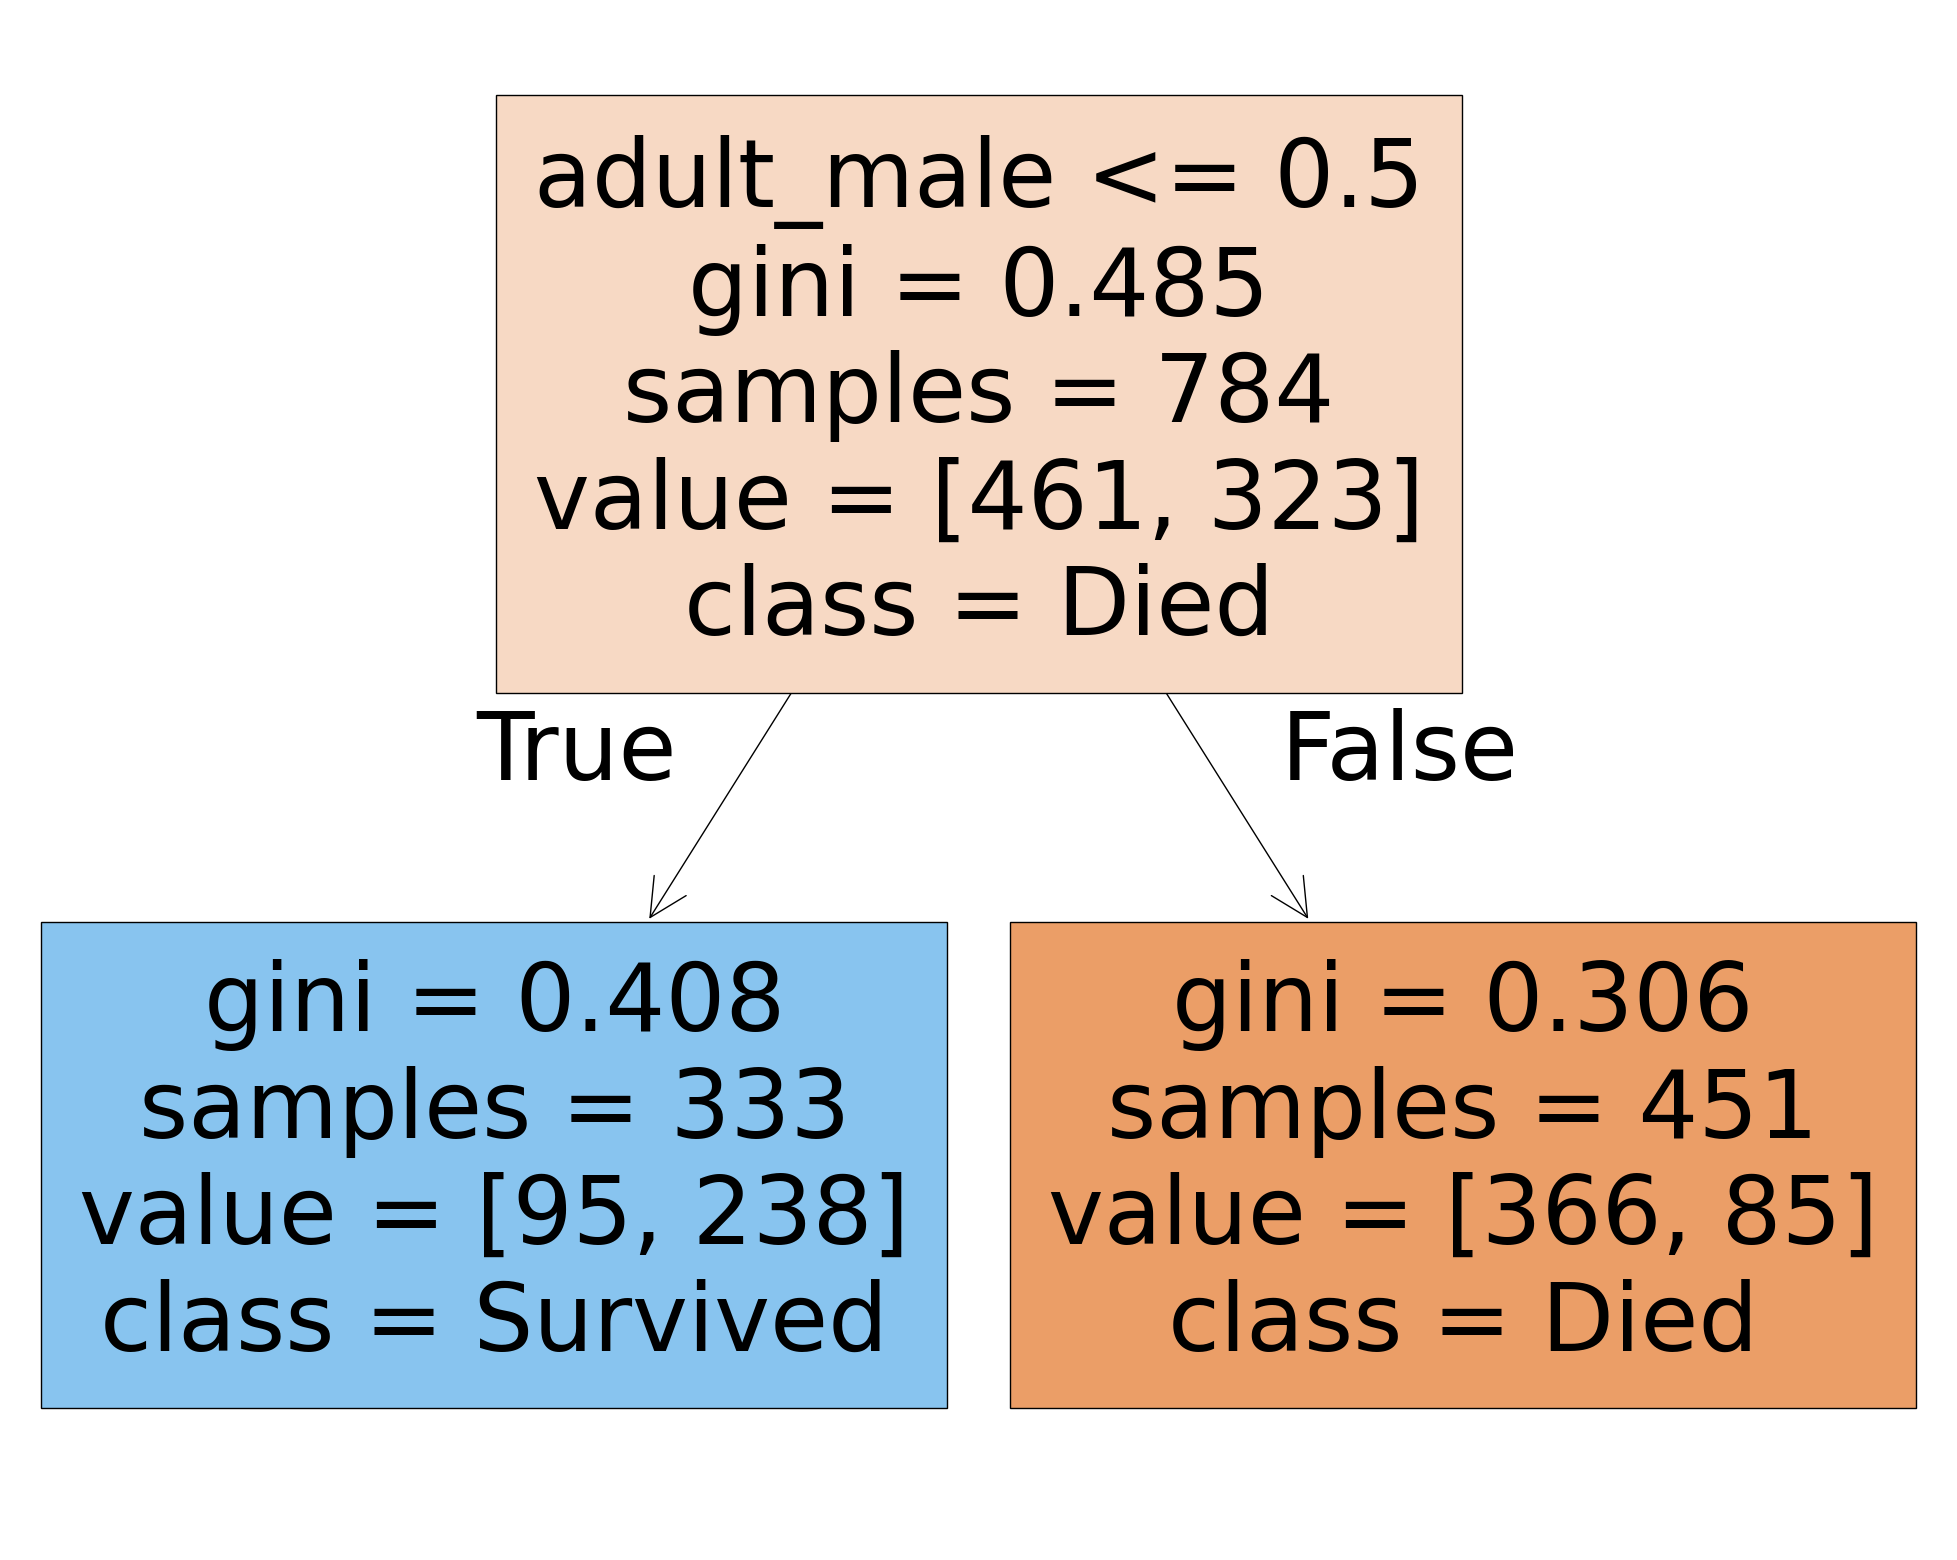

In [99]:
plt.figure(figsize=(25, 20))
plot_tree(clf,
          filled=True,
          class_names=['Died','Survived'],
          feature_names=['adult_male']);

In [100]:
clf = clf.fit(x[['class_Third']], y)
clf

DecisionTreeClassifier(random_state=100)

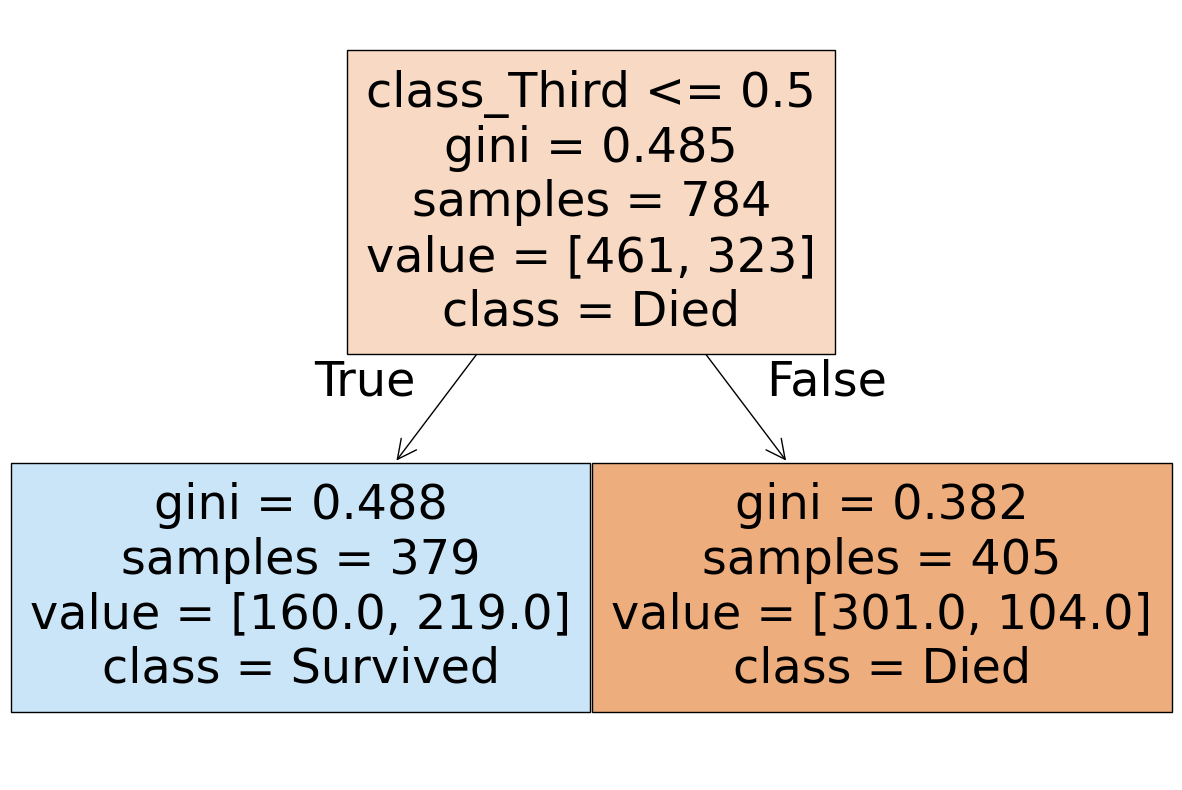

In [103]:
plt.figure(figsize=(15, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=['class_Third']);

In [105]:
clf = clf.fit(x[['adult_male','class_Third']],y)
clf

DecisionTreeClassifier(random_state=100)

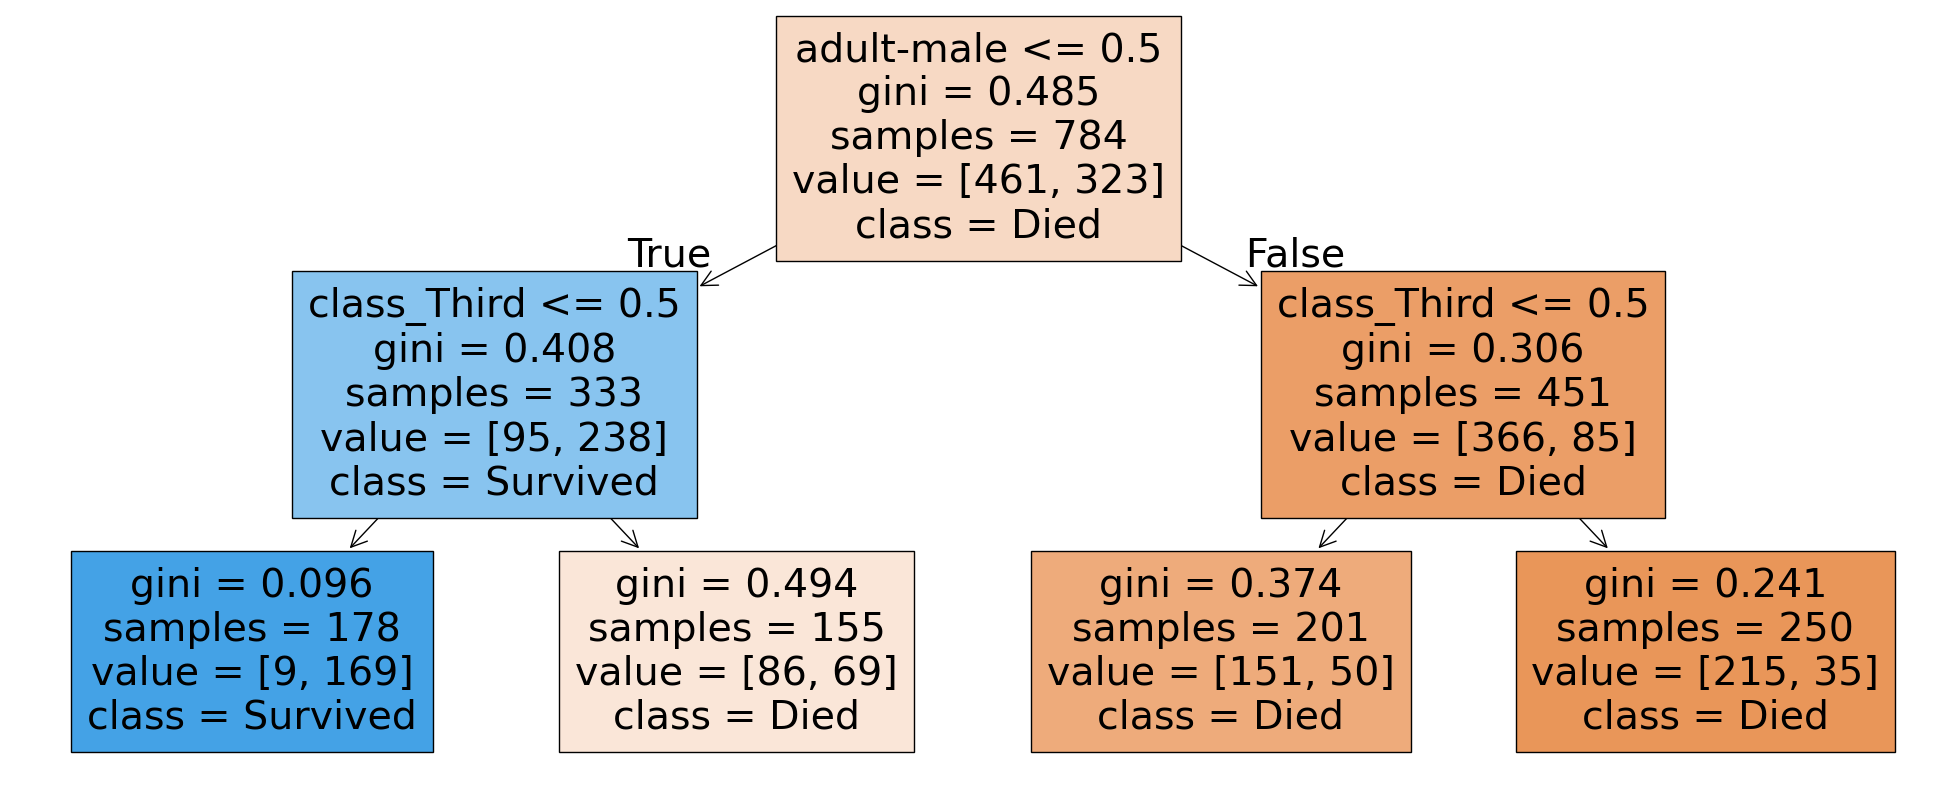

In [107]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Died','Survived'],
          feature_names=['adult-male','class_Third']);

In [109]:
clf = DecisionTreeClassifier(random_state=100, max_depth=1)
clf

DecisionTreeClassifier(max_depth=1, random_state=100)

In [111]:
clf = clf.fit(x[['fare']],y)
clf

DecisionTreeClassifier(max_depth=1, random_state=100)

In [113]:
x[['fare']].sort_values('fare')

,fare
170,0.0000
247,0.0000
255,0.0000
260,0.0000
283,0.0000
...,...
398,263.0000
317,263.0000
600,512.3292
243,512.3292


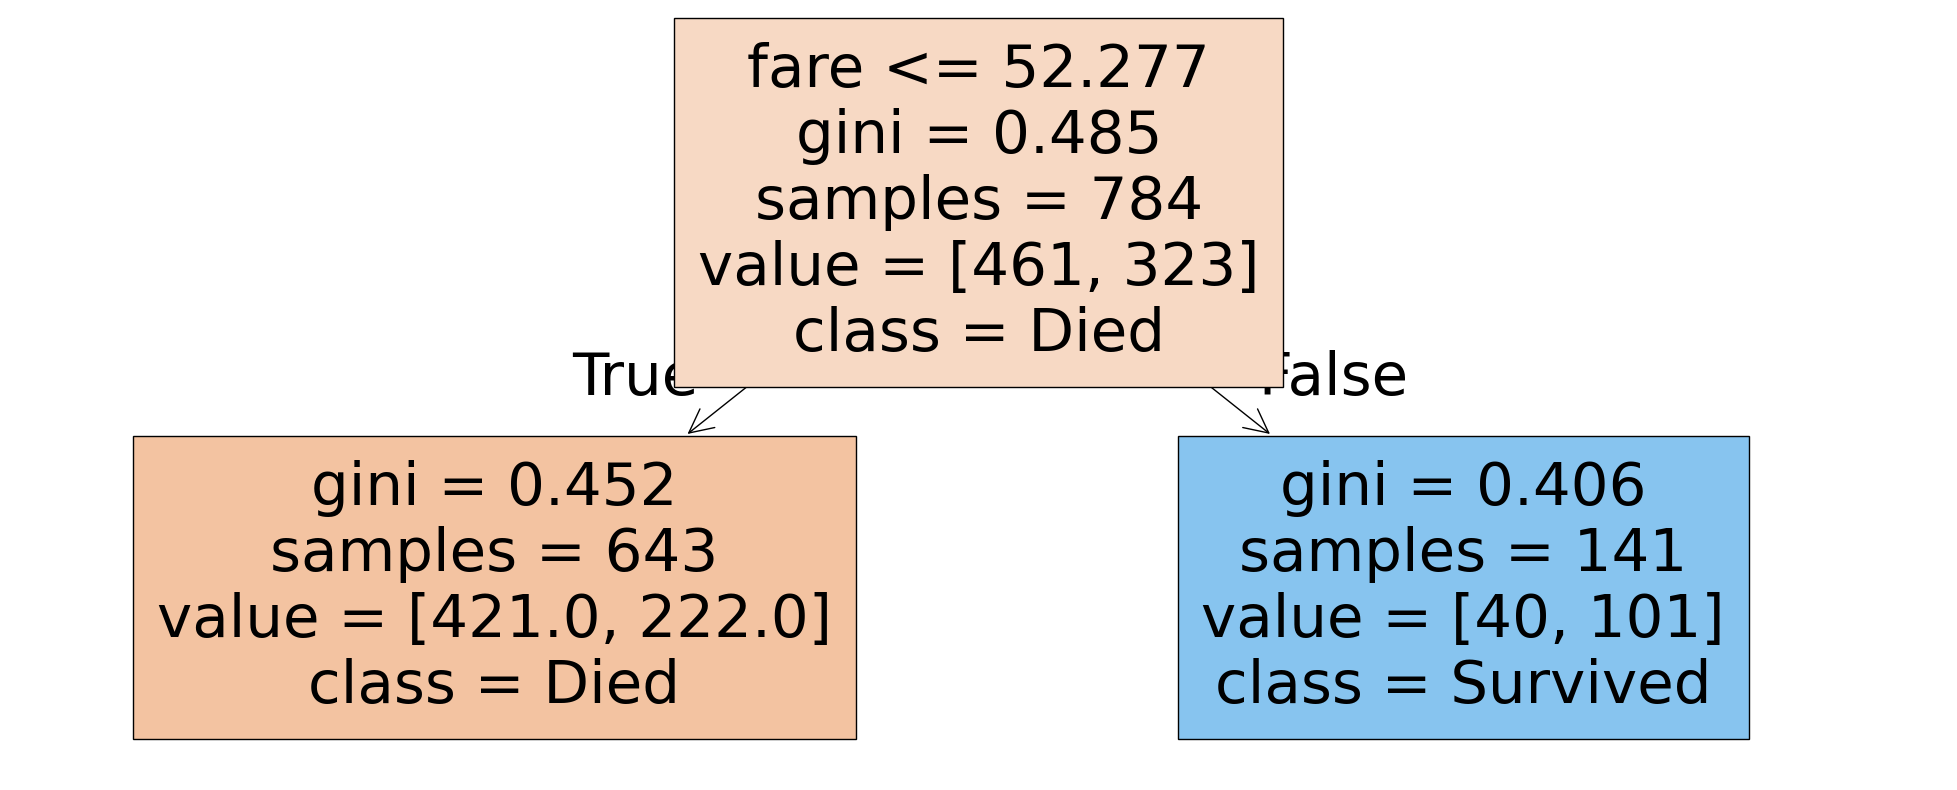

In [115]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Died','Survived'],
          feature_names=['fare']);

In [117]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [170]:
clf_dt = clf.fit(x, y)
clf_dt

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=100)

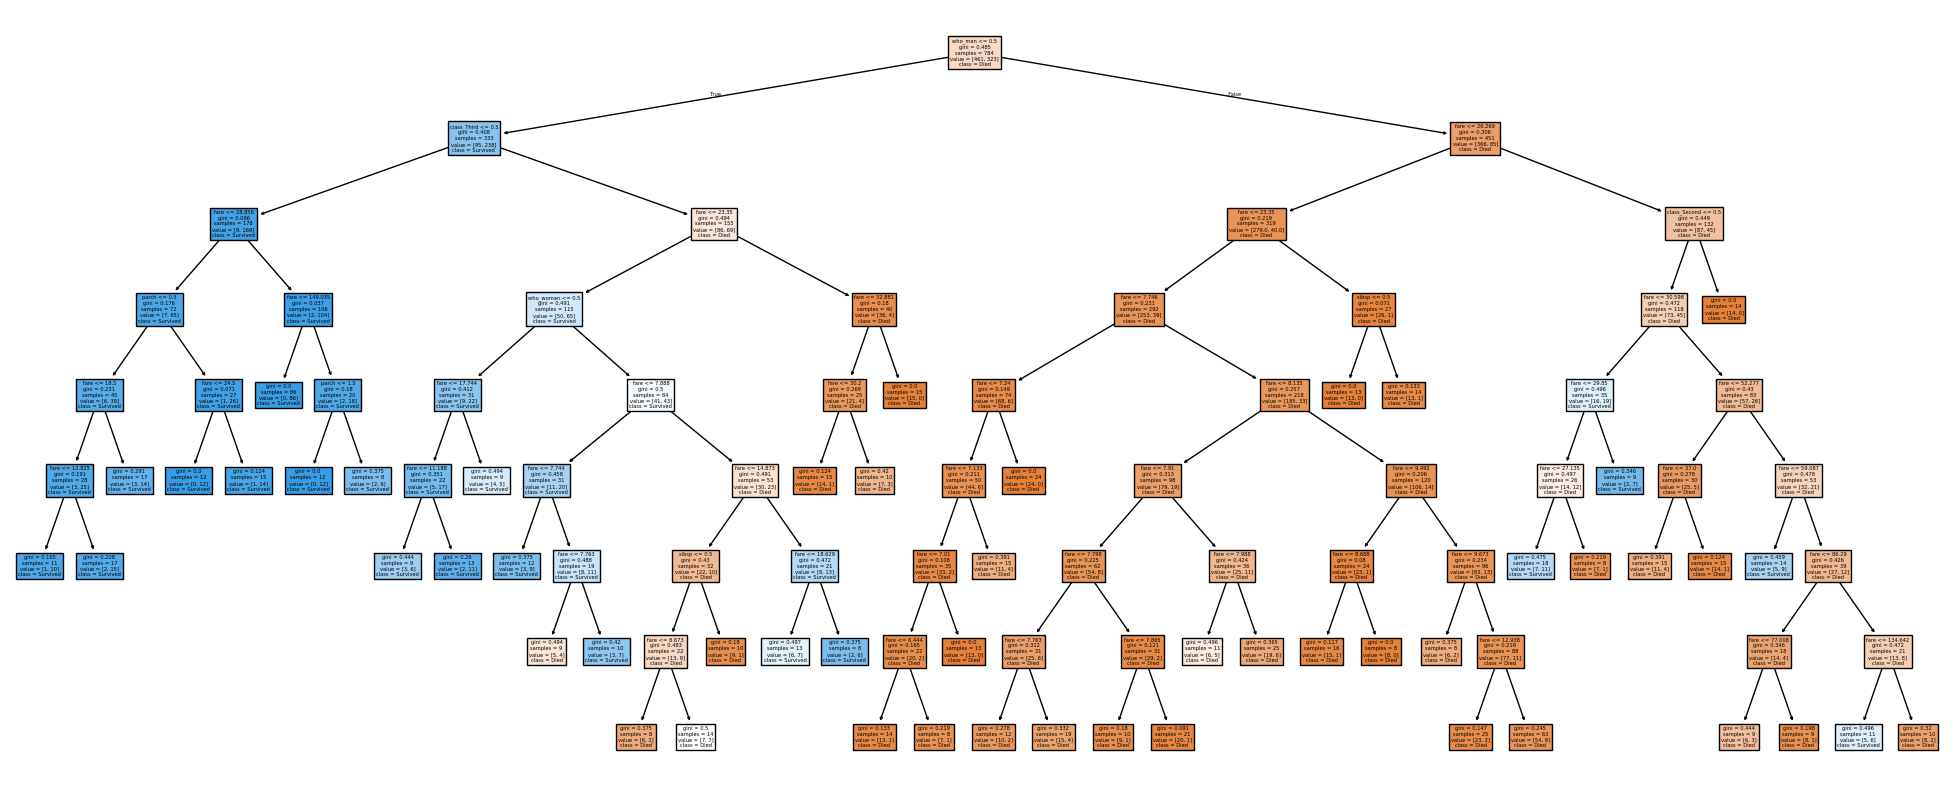

In [172]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=list(x.columns));

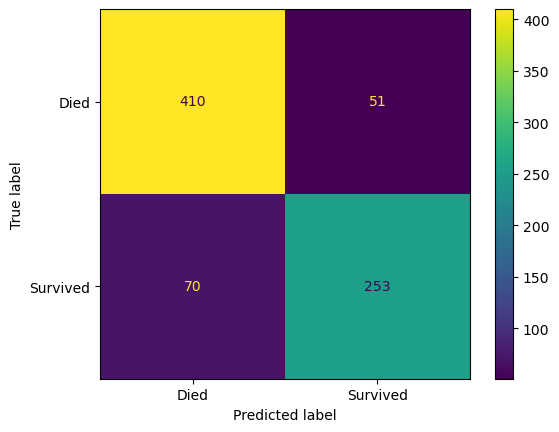

In [174]:
preditos = clf.predict(x)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

MatrizDeConfusao.plot()

In [176]:
predict = clf.predict(x)

In [178]:
accuracy_score(y, predict)

0.8456632653061225

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [182]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

In [184]:
y_chapeu_teste = clf.predict(x_test)
y_chapeu_teste

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [186]:
x_test.shape

(236, 10)

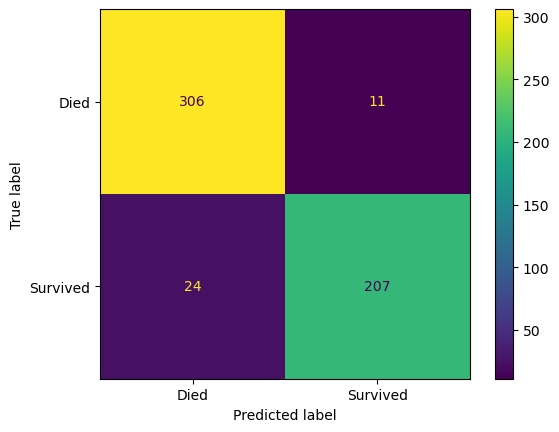

In [188]:
cm = confusion_matrix(y_train, clf.predict(x_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Died','Survived'])

MatrizDeConfusao.plot()

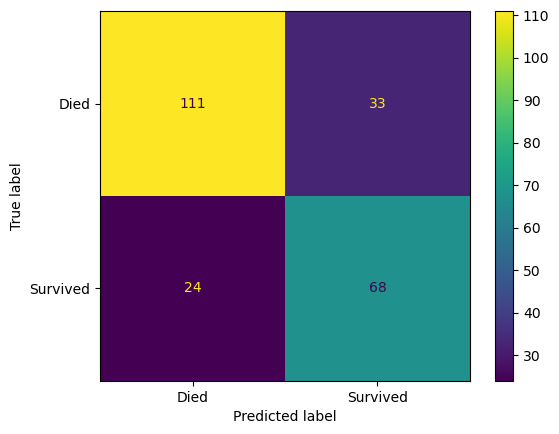

In [190]:
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Died','Survived'])

MatrizDeConfusao.plot()

In [192]:
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

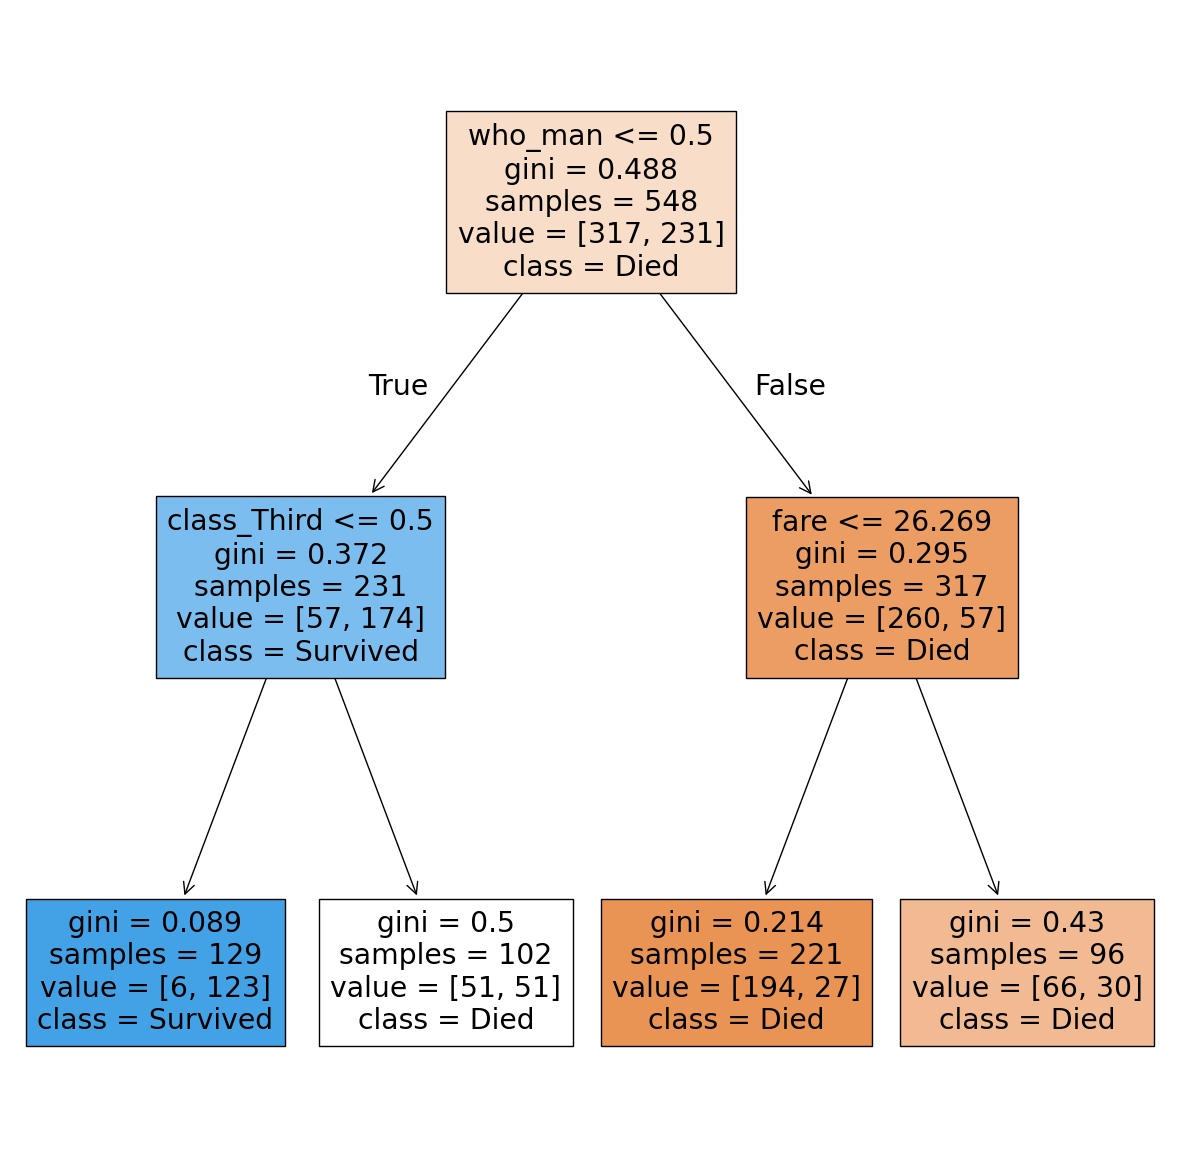

In [194]:
plt.figure(figsize=[15,15])
plot_tree(clf,
          filled=True,
          class_names=['Died','Survived'],
          feature_names=x_train.columns);

In [196]:
clf = DecisionTreeClassifier(min_samples_leaf=80, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

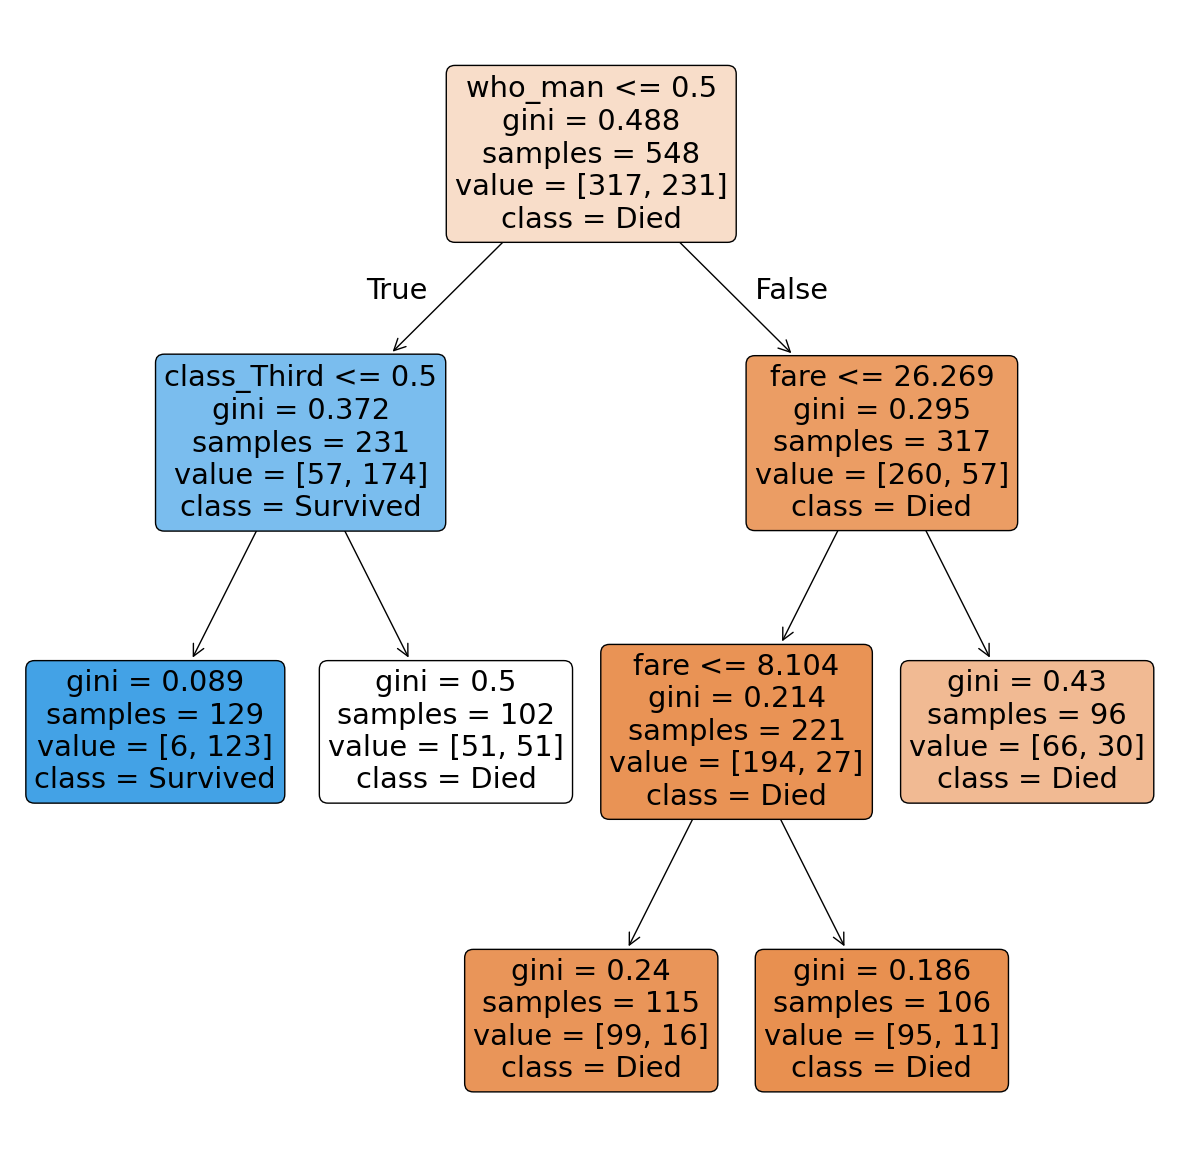

In [198]:
plt.figure(figsize=[15,15])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died','Survived'],
          feature_names=x_train.columns);


In [200]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7754237288135594

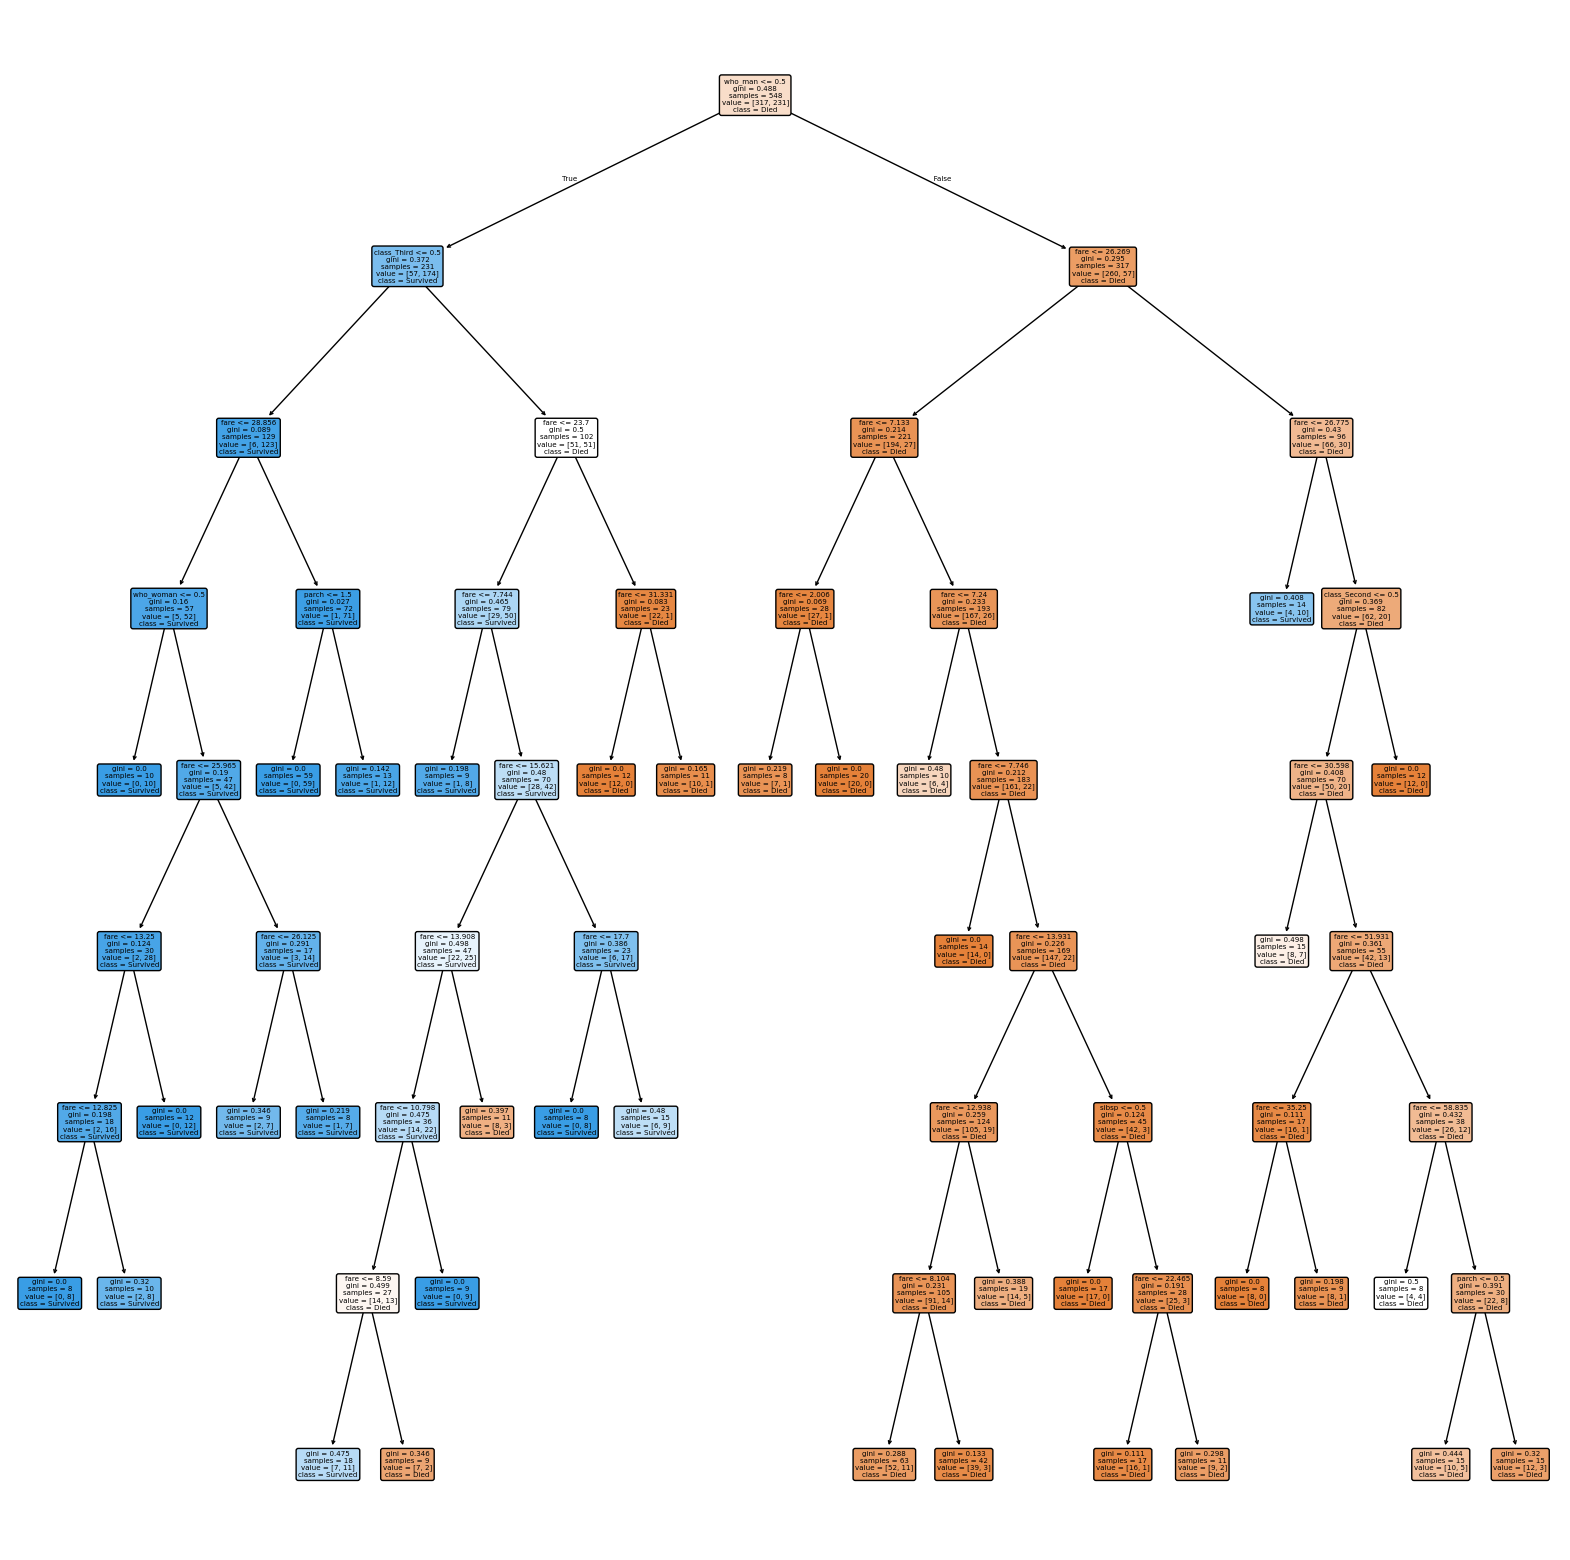

In [202]:
plt.figure(figsize=[20,20])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died','Survived'],
          feature_names=x_train.columns);

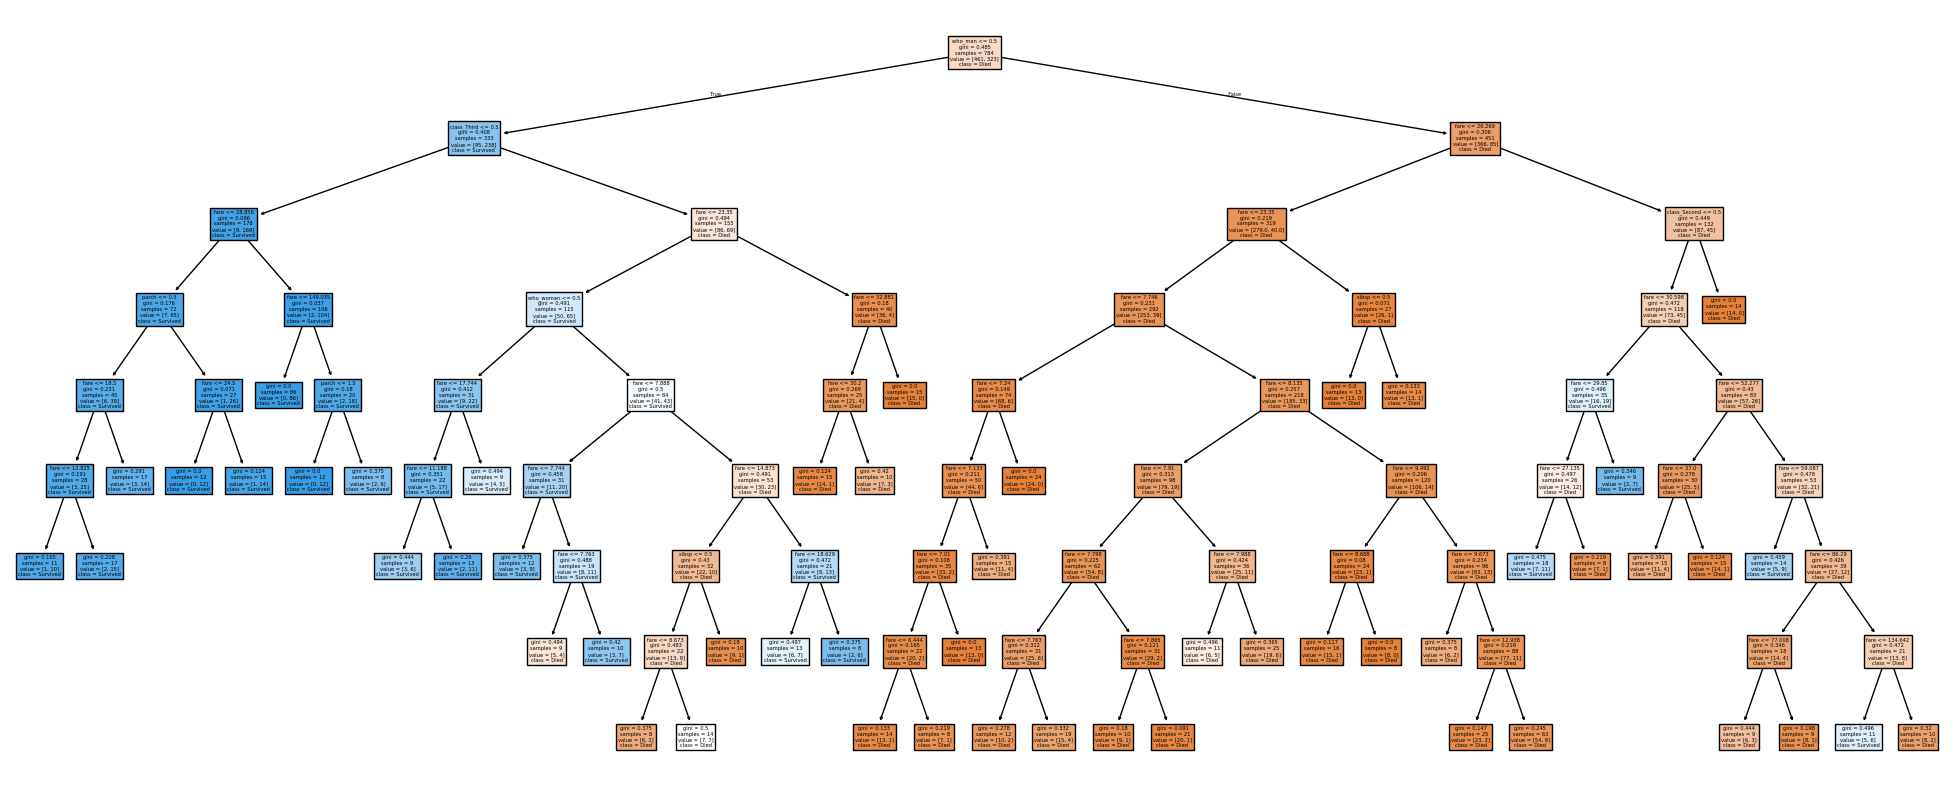

In [206]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=list(x.columns));

In [216]:
clf = DecisionTreeClassifier(random_state=100)
path=clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [218]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

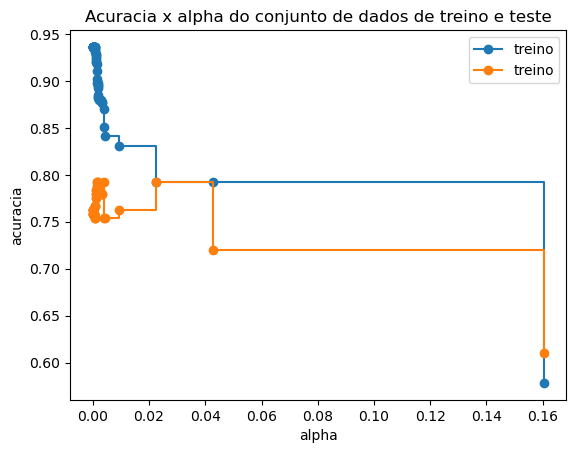

In [222]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("acuracia")
ax.set_title("Acuracia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="treino", drawstyle="steps-post")
ax.legend()
plt.show()

In [224]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.762712
1,0.000028,0.762712
2,0.000065,0.762712
3,0.000065,0.762712
4,0.000115,0.762712
5,0.000122,0.758475
6,0.000122,0.758475
7,0.000122,0.758475
8,0.000142,0.758475
9,0.000162,0.758475


In [230]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.022588)

0.7923728813559322

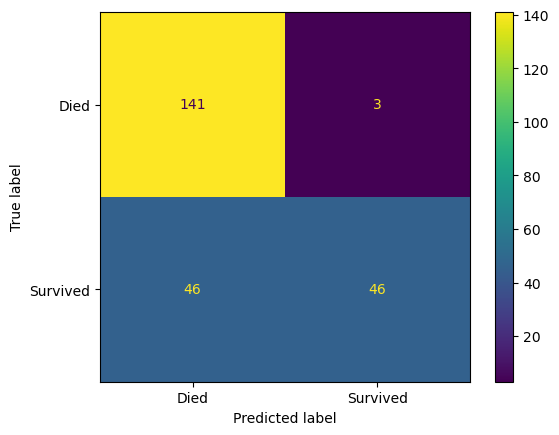

In [242]:
cm = confusion_matrix(y_test, clf_podada.predict(x_test), labels=clf_podada.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Died','Survived'])

MatrizDeConfusao.plot()
accuracy_score(y_test, predict)

In [244]:
pred = clf_podada.predict(x_test)

In [246]:
accuracy_score(y_test, pred)

0.7923728813559322

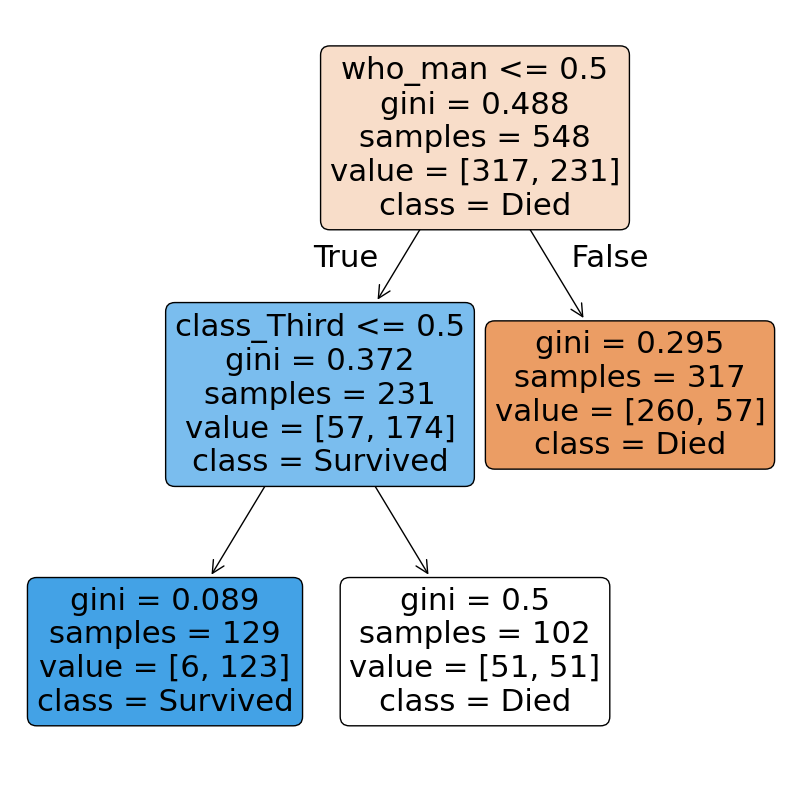

In [248]:
plt.figure(figsize=[10,10])
plot_tree(clf_podada,
          filled=True,
          rounded= True,
          class_names=['Died', 'Survived'],
          feature_names=x_train.columns);

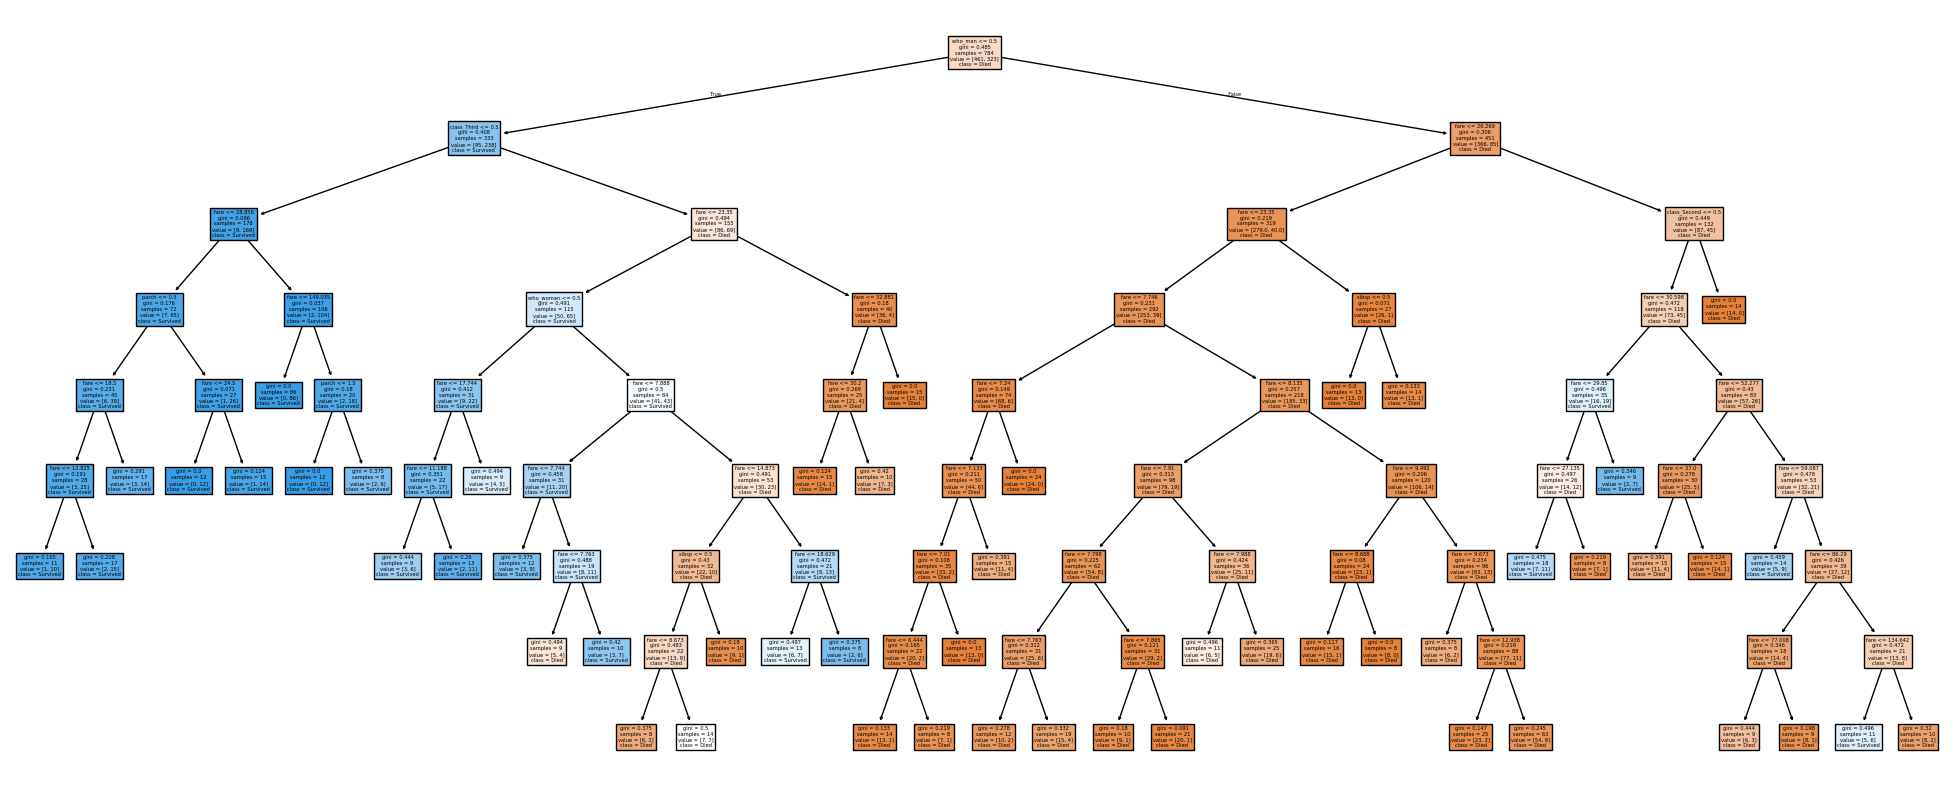

In [250]:
plt.figure(figsize=(25,10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=x.columns);